### Problem Statement
Your client is a retail banking institution. Term deposits are a major source
of income for a bank.
A term deposit is a cash investment held at a financial institution. Your
money is invested for an agreed rate of interest over a fixed amount of
time, or term. \
The bank has various outreach plans to sell term deposits to their
customers such as email marketing, advertisements, telephonic marketing
and digital marketing.
Telephonic marketing campaigns still remain one of the most effective way
to reach out to people. However, they require huge investment as large call
centers are hired to actually execute these campaigns. Hence, it is crucial
to identify the customers most likely to convert beforehand so that they can
be specifically targeted via call. \
You are provided with the client data such as : age of the client, their job
type, their marital status, etc. Along with the client data, you are also
provided with the information of the call such as the duration of the call, day
and month of the call, etc. Given this information, your task is to predict if
the client will subscribe to term deposit.


### Modules and dataset

In [ ]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Appliance energy dataset
df = pd.read_csv('/content/drive/MyDrive/Intershala Certificate/train.csv')

In [ ]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [ ]:
df.shape

(31647, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [ ]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


count     28982.000000
mean       1518.569043
std        3117.102995
min           0.000000
25%         148.000000
50%         544.000000
75%        1599.000000
max      102127.000000
Name: balance, dtype: float64

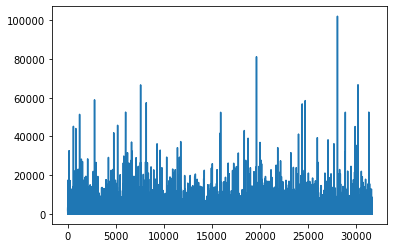

In [ ]:
df = df[df['balance']>=0]
plt.plot(df['balance'])
df['balance'].describe()

count    28982.000000
mean        41.644227
std         98.645974
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        871.000000
Name: pdays, dtype: float64

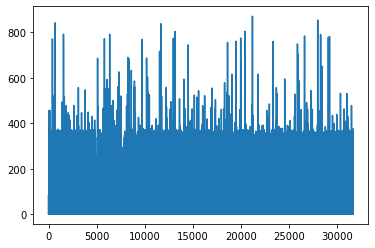

In [ ]:
df['pdays'] = df['pdays'].apply(abs)
plt.plot(df['pdays'])
df['pdays'].describe()

count    28981.000000
mean         0.580035
std          1.884791
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: previous, dtype: float64

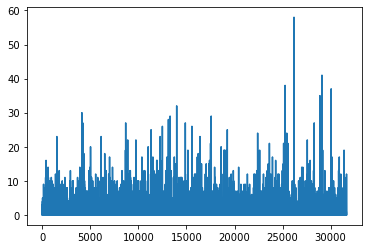

In [ ]:
df = df[df['previous']<100]
plt.plot(df['previous'])
df['previous'].describe()

#### Missing values

In [ ]:
df.isnull().sum().sum()

0

#### Univariate Analysis

<AxesSubplot:>

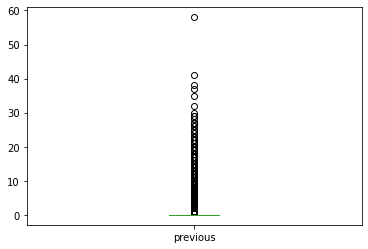

In [ ]:
df['previous'].plot.box()

In [ ]:
df = df[df['previous']<100]

In [ ]:
df['job'].value_counts()

management       6238
blue-collar      6035
technician       4840
admin.           3292
services         2565
retired          1491
self-employed    1061
entrepreneur      932
unemployed        854
housemaid         844
student           627
unknown           202
Name: job, dtype: int64

In [ ]:
df['marital'].value_counts()

married     17510
single       8237
divorced     3234
Name: marital, dtype: int64

In [ ]:
df['education'].value_counts()

secondary    14579
tertiary      8800
primary       4377
unknown       1225
Name: education, dtype: int64

In [ ]:
df['default'].value_counts()

no     28715
yes      266
Name: default, dtype: int64

In [ ]:
df['housing'].value_counts()

yes    15663
no     13318
Name: housing, dtype: int64

In [ ]:
df['loan'].value_counts()

no     24707
yes     4274
Name: loan, dtype: int64

In [ ]:
df['contact'].value_counts()

cellular     18888
unknown       8128
telephone     1965
Name: contact, dtype: int64

In [ ]:
df['month'].value_counts()

may    8498
jul    4243
aug    4115
jun    3457
nov    2667
apr    1955
feb    1728
jan     907
oct     511
sep     406
mar     338
dec     156
Name: month, dtype: int64

<AxesSubplot:>

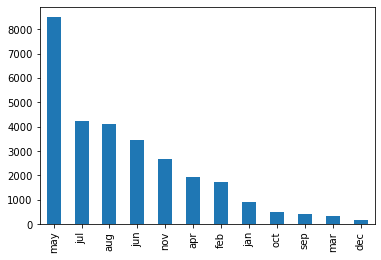

In [ ]:
df['month'].value_counts().plot.bar()

In [ ]:
df['poutcome'].value_counts()

unknown    23605
failure     3119
other       1201
success     1056
Name: poutcome, dtype: int64

In [ ]:
df['subscribed'].value_counts()

no     25402
yes     3579
Name: subscribed, dtype: int64

<AxesSubplot:>

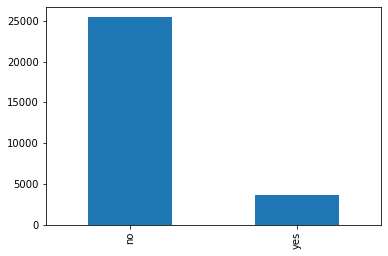

In [ ]:
df['subscribed'].value_counts().plot.bar()

#### Bivariate Analysis

subscribed  no  yes
age                
18           3    5
19          15    7
20          23   14
21          30   15
22          57   25
..          ..  ...
90           0    1
92           0    1
93           0    1
94           1    0
95           0    1

[76 rows x 2 columns]


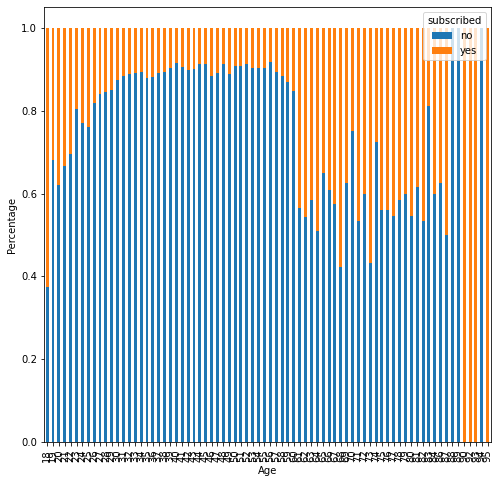

In [ ]:
print(pd.crosstab(df['age'],df['subscribed']))

age=pd.crosstab(df['age'],df['subscribed'])
age.div(age.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.rcParams['figure.figsize'] = (20, 20)

subscribed       no  yes
job                     
admin.         2862  430
blue-collar    5584  451
entrepreneur    855   77
housemaid       765   79
management     5326  912
retired        1136  355
self-employed   925  136
services       2334  231
student         445  182
technician     4266  574
unemployed      728  126
unknown         176   26


Text(0, 0.5, 'Percentage')

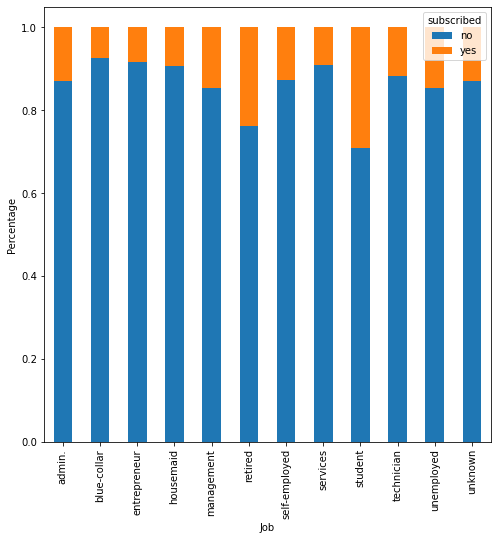

In [ ]:
print(pd.crosstab(df['job'],df['subscribed']))

job=pd.crosstab(df['job'],df['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

In [ ]:
defaulted = df[df['default']=='yes']

In [ ]:
single = defaulted[defaulted['marital']=='single']

In [ ]:
job = single[single['job']=='unemployed']

In [ ]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


### Transforming categorical data for subscription (yes/no) into (1/0)

In [ ]:
def transform_status(X):
    if X == 'yes':
        return 1
    elif X == 'no':
        return 0
    else:
        return -1
    
def process_data(df):
    df['subscribed'] = df['subscribed'].apply(transform_status)
    return df

df = process_data(df)

### Performing train test split

In [ ]:
std_test_size = 0.4286

In [ ]:
df = pd.get_dummies(df)

In [ ]:
x = df.drop(['subscribed'], axis=1)
y = df['subscribed']

In [ ]:
### Performing train test splitfrom sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=41)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000, n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model1.fit(x_train,y_train)

LogisticRegression(max_iter=1000, penalty='l1', random_state=0,
                   solver='liblinear')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=351)

In [ ]:
y_pred_train = model1.predict(x_train)
y_pred_test = model1.predict(x_test)

In [ ]:
model1.score(x_train,y_train)

0.903295376121463

In [ ]:
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.903295376121463
Test Accuracy:  0.9001092644775432


#### Generating confusion matrix array and store it in a variable called conmat

In [ ]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_pred_test)

#### Now, let’s create a dataframe from the confusion matrix array, called df_cm

In [ ]:
val = np.mat(con_mat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

print(df_cm)

       0    1
0  14792  401
1   1336  860


#### Visualizing the confusion matrix

<ipython-input-709-89cac471ca56>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_cm = df_cm.astype('float')/df_cm.sum(axis=1)[:, np.newaxis]


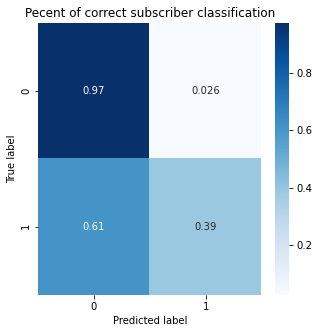

In [ ]:
df_cm = df_cm.astype('float')/df_cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (5,5))
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Pecent of correct subscriber classification')
plt.show()    

### Decision Tree

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=41)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2 = DecisionTreeClassifier(criterion = "entropy",
            random_state = 100,max_depth=3, min_samples_split=2, min_samples_leaf=5)

In [ ]:
# fitting the decision tree model
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

#### Hyperparameter tuning

In [ ]:
model2.tree_.max_depth

4

In [ ]:
for max_d in range(1,6):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(x_train, y_train)
    print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(x_train, y_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(x_test, y_test))
    print('')

The Training Accuracy for max_depth 1 is: 0.8712905452035887
The Validation Accuracy for max_depth 1 is: 0.8778089281863274

The Training Accuracy for max_depth 2 is: 0.8969979296066253
The Validation Accuracy for max_depth 2 is: 0.8955359068363166

The Training Accuracy for max_depth 3 is: 0.9026915113871635
The Validation Accuracy for max_depth 3 is: 0.9004960103515204

The Training Accuracy for max_depth 4 is: 0.9044168391994479
The Validation Accuracy for max_depth 4 is: 0.9005391416864352

The Training Accuracy for max_depth 5 is: 0.9126984126984127
The Validation Accuracy for max_depth 5 is: 0.8978218675868018



To get best result take max_depth = 4

#### Model continued...

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=351)

In [ ]:
# making prediction on the validation set
y_pred_train = model2.predict(x_train)
y_pred_test = model2.predict(x_test)

In [ ]:
model2.score(x,y)

0.9010386115040889

In [ ]:
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.893719806763285
Test Accuracy:  0.9028682337718352


#### Generating confusion matrix array and store it in a variable called conmat

In [ ]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_pred_test)

#### Now, let’s create a dataframe from the confusion matrix array, called df_cm

In [ ]:
val = np.mat(con_mat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

print(df_cm)

       0     1
0  19260  1089
1   1163  1673


#### Visualizing the confusion matrix

<ipython-input-959-826c403d7975>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]


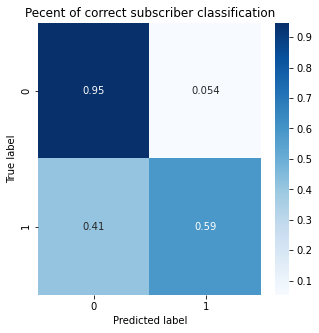

In [ ]:
df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (5,5))
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Pecent of correct subscriber classification')
plt.show()    

### Hyperparameter tuning in decision tree

In [ ]:
model2.tree_.max_depth

4

In [ ]:
for max_d in range(1,6):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(x_train, y_train)
    print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(x_train, y_train))
    print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(x_test, y_test))
    print('')

The Training Accuracy for max_depth 1 is: 0.8712905452035887
The Validation Accuracy for max_depth 1 is: 0.8778089281863274

The Training Accuracy for max_depth 2 is: 0.8969979296066253
The Validation Accuracy for max_depth 2 is: 0.8955359068363166

The Training Accuracy for max_depth 3 is: 0.9026915113871635
The Validation Accuracy for max_depth 3 is: 0.9004960103515204

The Training Accuracy for max_depth 4 is: 0.9044168391994479
The Validation Accuracy for max_depth 4 is: 0.9005391416864352

The Training Accuracy for max_depth 5 is: 0.9126984126984127
The Validation Accuracy for max_depth 5 is: 0.8978218675868018



### Random Forest

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=41)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
model3.fit(x_train, y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\Administrator\anaconda3\l

RandomForestClassifier(min_impurity_split=1e-07, n_estimators=10, n_jobs=2,
                       random_state=0)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=351)

In [ ]:
# making prediction on the validation set
y_pred_train = model3.predict(x_train)
y_pred_test = model3.predict(x_test)

In [ ]:
model3.score(x_train,y_train)

0.9139061421670117

In [ ]:
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.9139061421670117
Test Accuracy:  0.9163252102652577


#### Generating confusion matrix array and store it in a variable called conmat

In [ ]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_pred_test)

#### Now, let’s create a dataframe from the confusion matrix array, called df_cm

In [ ]:
val = np.mat(con_mat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

print(df_cm)

       0     1
0  19871   478
1   1462  1374


#### Visualizing the confusion matrix

<ipython-input-730-826c403d7975>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]


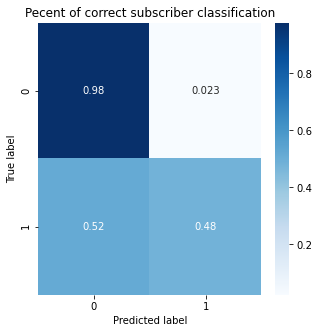

In [ ]:
df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (5,5))
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Pecent of correct subscriber classification')
plt.show()    

# Conclusion - Decision tree is the best fit model for the provided data with 95% of currectly predicting not subscribed and 59% of currectly predictive subscribed.